# Recommendation system

References:
1. <https://www.itm-conferences.org/articles/itmconf/pdf/2017/04/itmconf_ita2017_04008.pdf>
2. <https://medium.com/datadriveninvestor/how-to-built-a-recommender-system-rs-616c988d64b2>
3. <https://en.wikipedia.org/wiki/Matrix_factorization_(recommender_systems)>
4. <https://antoinevastel.com/machine%20learning/python/2016/02/14/svd-recommender-system.html>
5. "Recommendation Systems" by Paterak
6. "Recommender systems - the textbook" by  Charu C. Aggarwal
7. <http://www.ideal.ece.utexas.edu/seminar/LatentFactorModels.pdf>




Recommendation systems are common thing in today's buisness. Big companies like Netflix, Youtube or Amazon are upgrading them all the time. Practically we can build recommendation system much less complicated than the Netflix's one and it won't be so hard. We can distinguish few ways of doing so. The image below summarises that pretty well (source: internet).

<div>
<img src="recommendation_sytstem_approaches.png" width="700"/>
</div>

The 2 main approches are content filtering and collaborative filtering. First refers to looking for similarities between the content (movies, books, etc.) and the second (called _user-content_ filtering) is trying to group the users with similar interests together. Content filtering needs some additional informations about items, like for example (movies) the genre, year of production, main actor/actress, rewards. If there are no such information available then content based apprach is not a valid option.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv("D:\\MM\\reccomendation_system_for_movies\\data\\ml-25m\\ratings.csv")

movie_titles = pd.read_csv("D:\\MM\\reccomendation_system_for_movies\\data\\ml-25m\\movies.csv")
print(df.shape, movie_titles.shape)

(25000095, 4) (62423, 3)


In [3]:
#merging movie database to add movie names 
df = pd.merge(df, movie_titles, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


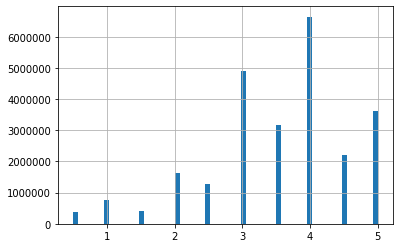

srednia z proby: 3.533854451353085


In [4]:
df.rating.hist(bins = 60)
plt.show()
print("srednia z proby:",df.rating.mean())

Instesting the data from movies perspective:

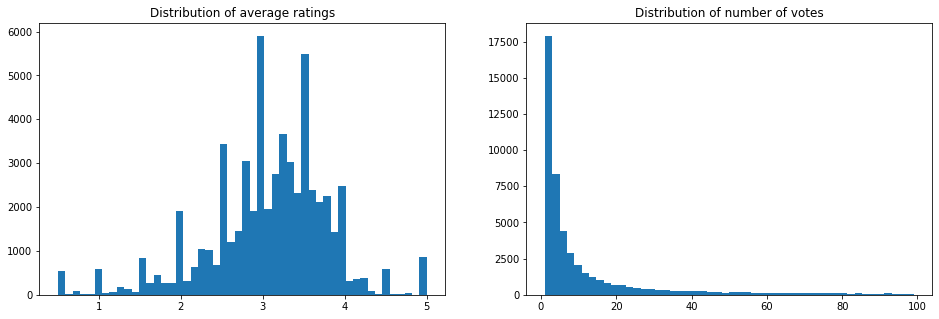

In [5]:
ratings = pd.DataFrame(df.groupby(by = "title")["rating"].mean())
ratings["number_of_ratings"] = pd.DataFrame(df.groupby('title')["rating"].count())
ratings.head()
figure1 = plt.figure(figsize=(16,5))
plt.subplot(121)
plt.hist(ratings['rating'], bins = 50)
plt.title("Distribution of average ratings")
plt.subplot(122)
plt.title("Distribution of number of votes")
plt.hist(ratings["number_of_ratings"][ratings['number_of_ratings']<100], bins = 50)
plt.show()

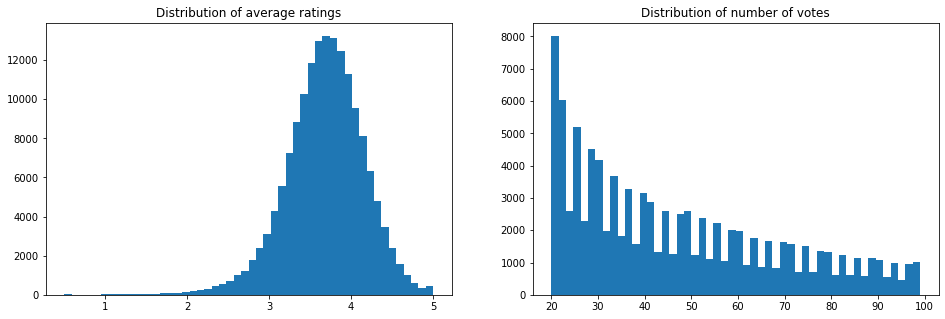

In [6]:
users_data = pd.DataFrame(df.groupby(by = "userId")["rating"].mean())
users_data["number_of_rated_movies"] = pd.DataFrame(df.groupby("userId")["rating"].count())
users_data.head()
figure2 = plt.figure(figsize=(16,5))
plt.subplot(121)
plt.hist(users_data['rating'], bins = 50)
plt.title("Distribution of average ratings")
plt.subplot(122)
plt.title("Distribution of number of votes")
plt.hist(users_data["number_of_rated_movies"][users_data["number_of_rated_movies"]<100], bins = 50)#keeping the scale
plt.show()

Many movies are very unpopular. Most of them are rated by less than 20 people. I will delete some of the titles (with less than 100 ratings). It will also solve potential problem with memory. It is also worth mentiong the characteristics of this distribution. It is heavily skewed. (I should put an article about connection with this distribution and qualioty of the recommendation system).

In [7]:
popular_movies = ratings.index[ratings["number_of_ratings"]>100]
df_cleared = df[df["title"].isin(popular_movies)]
df_cleared.shape #we didn't lose much information

(24440317, 6)

In [8]:
#due to the problems with memory I will work on 4 milion observations
movie_matrix = df_cleared.iloc[:int(4*10**6),:].pivot_table(index="title", columns="userId", values="rating")
 
movie_matrix.shape

(246, 161268)

In [9]:
movie_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,162532,162533,162534,162535,162536,162537,162538,162539,162540,162541
title,,,,,,,,,,,,,,,,,,,,,
2046 (2004),4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"40-Year-Old Virgin, The (2005)",NaN,0.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5x2 (2004),3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aladdin (1992),NaN,2.0,NaN,NaN,4.0,NaN,4.0,5.0,5.0,3.0,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,4.5,NaN,NaN,NaN,4.5,NaN,NaN,4.5


The characteristic trait of this type of data is extreme sparsity. Around ~99% of information are missing. I will start by building a recommendation system by using a fairly simple algorithm, and then I will still work on the same data, but I will enhane the difficulty and complexity of the algorithms and models used.

## K nearest neighbor algorithm

We have to modify K-nn algorithm slighty, due to big dimension of our data. Instead of using classical euclidan measure of distance we will use a _cosine_ funcion which measures the similarity between 2 vectors. It is equal to 1 when the vectors are identical and 0 when the vectors are orthonormal. There is also another approach for this type of problem (*curse of dimensionality*) which is LSH algorithm. We can use it istead of _cosine_ function.

The item-based approach will be used here.

In [10]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

Before we will fit the data into model we have to change the *NaN* values to $0$ to make it work properly. Zeros do not change the value of *cosine* function. 

In [11]:
movie_matrix_fixed = movie_matrix.fillna(0)
model_knn.fit(movie_matrix_fixed)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [12]:
movie_12_angry_men = movie_matrix_fixed[movie_matrix_fixed.index == "12 Angry Men (1957)"]
movie_pulp_fiction = movie_matrix_fixed[movie_matrix_fixed.index == "Pulp Fiction (1994)"]
N = 10

distances, indices = model_knn.kneighbors(movie_pulp_fiction, N+1, return_distance=True)
propozycje = movie_matrix_fixed.index[indices][0]

In [13]:
print("For the",propozycje[0],"the most",N,"similiar movies are:")
for i in range(1,len(propozycje)):
    print(str(i)+":",propozycje[i])   

For the Pulp Fiction (1994) the most 10 similiar movies are:
1: Shawshank Redemption, The (1994)
2: Forrest Gump (1994)
3: Matrix, The (1999)
4: Terminator 2: Judgment Day (1991)
5: Braveheart (1995)
6: Schindler's List (1993)
7: Jurassic Park (1993)
8: Godfather, The (1972)
9: Fugitive, The (1993)
10: Apollo 13 (1995)


With this approach we can suggest movies similar to the ones we have on input. However the algorithm isn't perfect. As you casn see he is suggesting movies that are popular and come from similar year. The perfect algorithm can also suggest movies from different years and some less popular ones.

Another way to tackle this problem is **user-based collaborative filering**. Let's assume we want to recommend some movies to our friend Jacob. We are trying to find users similar (with similar ratings for the same movies) to Jacob, and then suggest Jacob movies that (similar to him users) loved. For making this algoritm work we have do to the following:
1. Generate user-item matrix (with dimension $n$x$m$, where $n$ - numer of users, $n$ - number of items (movies). The matrix will contain scores for each user-movie pair.
2. Calculate the similarity between every 2 users (using for example *cosine similarity*) and create a matrix filled with outcomes for each pair (dimension is $n$x$n$).
3. With Knn algorithm (for user u) find the $K$ neighbors of u.
4. Use equation $\hat{r}_{u,i} = \bar{r}_{u} + c \sum_{u' \in U}{sim(u, u')(r_{u'} - \bar{r}_{u'})}  $, where $c = \frac{1}{\sum{sim(u,u')}}$ (score for user r and movie i) to calculate the rating for not-watched movies for user u.
5. Finally when we have all prediction, we can pick the $N$ highest rated movies (based on our predictions) for recommendations for user u.

Just to be claer here is the link to wikipedia page about [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity). Differences between user-user and item-item methon are well described here: <https://en.wikipedia.org/wiki/Item-item_collaborative_filtering>. Below I present the code for user-based collaborative filtering method. When trying to produce 162525x162525 matrix the problem with memory has occured. Because of that I have used sci-py sparse matrix.

In [14]:
#number of users
n_users = movie_matrix_fixed.shape[1]
n_movies = movie_matrix_fixed.shape[0]
#cosine similarity
def sim(v1, v2):
    return sum(v1*v2) / ( (sum(v1**2))**0.5 *  (sum(v2**2))**0.5 )



#user - user similarity matrix
uu_matrix = scipy.sparse.csr_matrix((n_users,n_users),dtype="int32")
#filling user - user matrix with proper values
for i in range(5):
    for j in range(5):
        uu_matrix[i,j] = sim(movie_matrix_fixed.iloc[:,i],movie_matrix_fixed.iloc[:,j])
        #print(i,j,uu_matrix[i,j])#something is not working, first row isn't filled correctly, maybe something about spare matrixes

It turns out that producing 160000x160000 matrix is too computationally difficult for my machine. For now I don't have solution for that (beside removing most of the users from a data base). If somehow I will figure out solution for this iseeu I'll come back and finish this idea. Additionaly for most of the users cosine similarity is equal to 0. We have many movies and not many ratings. In general (rule of thumb) it's better to use item-item instaed of user-user approach when there are more users than  items and the ratings of items do not chnage much. In our situation this could be a solution. 

**Litlle update**: actually I have come with with matrix formula to calculate user-user matrix. We will need to multiply 4 matrixes, the formula goes as follows:
$$  U = DMM^{T}D,     $$
where $U$ is $n$x$n$ user-user matrix, $M$ is the $n$x$m$ user-movie matrix filled with ratings, and $D$ is diagonal $n$x$n$ matrix, and $D_{ii} = \frac{1}{||u_{i}||}$.

**Another update**: My idea didn't work so I have decided to make item-item matrix, which is possible to compute.

In [15]:
#movie_matrix = scipy.sparse.csr_matrix(movie_matrix_fixed, dtype="int32")#to save memory

#user-user
inverted_norms = np.array([1/(sum(movie_matrix_fixed.iloc[:,i]**2)**0.5) for i in range(n_users)], dtype="float32")
D = scipy.sparse.dia_matrix((inverted_norms,0), shape=(n_users,n_users), dtype="float32")#0 means we choose diagonal "from middle"

In [16]:
#item-item
inverted_norms = np.array([1/(sum(movie_matrix_fixed.iloc[i,:]**2)**0.5) for i in range(n_movies)], dtype="float32")
D = scipy.sparse.dia_matrix((inverted_norms,0), shape=(n_movies,n_movies), dtype="float32")#0 means we choose diagonal "from middle"

In [17]:
#something is not yes
#ii_matrix = D @ movie_matrix_fixed @ movie_matrix_fixed.T @ D

IndexError: tuple index out of range

In [ ]:
#movies = movie_matrix.index
#len(list(movies))
#movie_matrix.T.shape

In [ ]:
#ii_matrix.toarray()

My idea didn't help, it still doesn't want to work.

There is also something called **cold start** problem. It happens when a new user joins and he has no ratings, so we can't effectively give him any suggestions. [ Following paper](https://www.researchgate.net/publication/260014323_A_new_user_similarity_model_to_improve_the_accuracy_of_collaborative_filtering/figures?lo=1) disscuses some ideas of upgrading the collaborative filterging algorithm.

**Warning**: From now on I will work on new dataset, smaller [MovieLens](https://www.kaggle.com/prajitdatta/movielens-100k-dataset). The dataset is richer than the previous one, we know users gender, occupation, age. For now I am exploring *collaborative filtreing* aproach so I won't be using this data.

In [2]:
#Reading Users file:
u_cols = ['User_ID', 'Age', 'Sex', 'Occupation', 'ZIP_Code']
users = pd.read_csv("D:\\MM\\reccomendation_system_for_movies\\movielens_100k\\ml-100k\\u.user",
                    sep="\|", names=u_cols,encoding="latin-1")

#Reading Ratings file:
r_cols = ['User_ID', 'Movie_ID', 'Rating', 'Timestamp']
ratings = pd.read_csv('D:\\MM\\reccomendation_system_for_movies\\movielens_100k\\ml-100k\\u.data',
                      sep='\t', names=r_cols,encoding='latin-1')

merged = pd.merge(users, ratings, on = 'User_ID')
movie_matrix = (pd.pivot_table(data = merged, index="Movie_ID", columns="User_ID", values="Rating")).T
print("Shape:",movie_matrix.shape)

Shape: (943, 1682)


In [3]:
n_users = movie_matrix.shape[0]
n_movies = movie_matrix.shape[1]
print("Missing values are:",str(round(movie_matrix.isna().sum().sum()/(n_users*n_movies)*100,3))+"% of the data.")

Missing values are: 93.695% of the data.


## SVD (latent factor model)

**SVD** is linear algebra method, used for dimension reduction. The basic idea of this techniques is to rotate the axis system that pairwaise correaltions between some of the dimensions are removed. In general dimensianality reduction methods are used for representing data in more functional way, but with SVD we aim into estimating directly the data matrix. For this approach I will assume following relationship:
$$\hat{r}_{ij} = \mu + c_{i} + d_{j} + \sum_{k}{u_{ik}v_{jk}}, $$ where $c_i$ is user bias, $d_{j}$ is movie bias $\mu$ is global bias and vectors $v_{jk}$ and $u_{ik}$ are hidden variables (chyba), that come from SVD decomposition. I will start of by calculationg the $\mu$, simply as a global mean. Then I will calculate $c_i$, and $d_i$ in iterative way (see [Paterek, page 73] for details).

In [4]:
mu = movie_matrix.sum().sum()/(n_users*n_movies-movie_matrix.isna().sum().sum())
d = (movie_matrix-mu).apply(lambda x: x.sum()/x.count(), axis = 0).fillna(0)

In [5]:
n_iters = 5
const_c = 1
const_d = 1
for i in range(n_iters):
    c = (movie_matrix-mu-d).apply(lambda x: x.sum()/(const_c+x.count()), axis = 1)
    d = (movie_matrix-mu - c).apply(lambda x: x.sum()/(const_d+x.count()), axis = 0)  
    
c = np.array(c).reshape(n_users, 1)
d = np.array(d).reshape(1, n_movies)

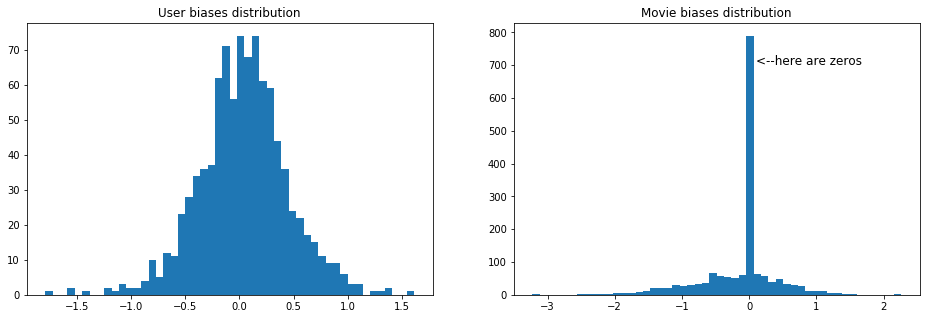

In [10]:
figure2 = plt.figure(figsize=(16,5))
plt.subplot(121)
plt.hist(c, bins = 50)
plt.title("User biases distribution")
plt.subplot(122)
plt.text(0.1, 7*10**2, s = "<--here are zeros", fontsize=12)
plt.title("Movie biases distribution")
plt.hist(d.reshape(n_movies, 1), bins = 50)
plt.show()

Now, when we have obtained $\mu$, $c_i$ and $d_j$ we can movie to SVD decomposition. All the idea is well described in [Charu C. Aggarwal, page 93-]

In [11]:
R = (movie_matrix - mu -d - c).fillna(0)

In [12]:
U, s, Vh = np.linalg.svd(R)
S = np.diag(s)

In [13]:
k = 100 #number of latent variables
n_iters = 10 
for i in range(n_iters):
    U, s, Vh = np.linalg.svd(R)
    S = np.diag(s[:k])
    svd =  np.array( U[:,:k] @ S @ Vh[:k,:] + mu) + c + d
    R = (movie_matrix.isna() * svd) + movie_matrix.fillna(0) - mu - d - c

final_R = R + mu + d + c

In [14]:
final_R

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.000000,3.000000,4.000000,3.000000,3.000000,5.000000,4.000000,1.000000,5.000000,3.000000,...,3.672196,3.643312,3.648001,3.648776,3.651183,3.620762,3.643547,3.632154,3.648197,3.626972
2,4.000000,3.013305,3.363825,2.498158,3.490252,4.514974,3.751475,4.004053,3.594891,2.000000,...,3.740558,3.717514,3.737519,3.744180,3.735443,3.825427,3.747314,3.786370,3.733416,3.735917
3,3.446240,2.797710,2.795121,2.059811,2.803538,2.898324,3.291034,2.935106,3.611885,2.610644,...,3.214092,3.149381,3.128298,3.075175,3.158393,3.217231,3.168132,3.192682,3.159868,3.172256
4,4.653767,3.545068,4.575486,3.289394,4.620643,4.916835,4.332586,4.640771,3.634242,4.820776,...,4.683283,4.613496,4.610269,4.608659,4.610717,4.564008,4.604167,4.584087,4.610580,4.620051
5,4.000000,3.000000,2.172704,1.604660,3.545946,3.278407,2.806369,2.531011,3.213390,2.686081,...,3.227505,3.169856,3.231451,3.334374,3.161522,3.184990,3.173061,3.179025,3.171170,3.160387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,4.796621,3.618386,3.714131,3.631568,4.893992,4.990363,4.612951,4.287567,5.000000,4.598316,...,4.600379,4.573831,4.598061,4.647713,4.569357,4.409757,4.545126,4.477441,4.569264,4.568355
940,4.354688,3.298353,3.154826,2.000000,3.395540,3.695393,4.000000,5.000000,3.000000,3.184118,...,3.283839,3.316353,3.301063,3.288660,3.315090,3.397176,3.321613,3.359395,3.308500,3.311345
941,5.000000,3.682902,3.638153,3.028973,4.299110,4.228810,4.000000,4.372528,3.791150,4.223308,...,4.008579,3.950091,3.937775,3.916442,3.954913,3.976870,3.954276,3.965573,3.950829,3.949540


In [186]:
movie_matrix

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## RBM - Restricted Boltzmann Machine

The restricted Boltzmann Macines are stochastic algorithms that work on a basis of unservised learning (with unlabelled data). 

In [20]:
class RBM:
  
  def __init__(self, num_visible, num_hidden):
    self.num_hidden = num_hidden
    self.num_visible = num_visible
    self.debug_print = True

    # Initialize a weight matrix, of dimensions (num_visible x num_hidden), using
    # a uniform distribution between -sqrt(6. / (num_hidden + num_visible))
    # and sqrt(6. / (num_hidden + num_visible)). One could vary the 
    # standard deviation by multiplying the interval with appropriate value.
    # Here we initialize the weights with mean 0 and standard deviation 0.1. 
    # Reference: Understanding the difficulty of training deep feedforward 
    # neural networks by Xavier Glorot and Yoshua Bengio
    np_rng = np.random.RandomState(1234)

    self.weights = np.asarray(np_rng.uniform(
			low=-0.1 * np.sqrt(6. / (num_hidden + num_visible)),
                       	high=0.1 * np.sqrt(6. / (num_hidden + num_visible)),
                       	size=(num_visible, num_hidden)))


    # Insert weights for the bias units into the first row and first column.
    self.weights = np.insert(self.weights, 0, 0, axis = 0)
    self.weights = np.insert(self.weights, 0, 0, axis = 1)

  def train(self, data, max_epochs = 1000, learning_rate = 0.1):
    """
    Train the machine.
    Parameters
    ----------
    data: A matrix where each row is a training example consisting of the states of visible units.    
    """

    num_examples = data.shape[0]

    # Insert bias units of 1 into the first column.
    data = np.insert(data, 0, 1, axis = 1)

    for epoch in range(max_epochs):      
      # Clamp to the data and sample from the hidden units. 
      # (This is the "positive CD phase", aka the reality phase.)
      pos_hidden_activations = np.dot(data, self.weights)      
      pos_hidden_probs = self._logistic(pos_hidden_activations)
      pos_hidden_probs[:,0] = 1 # Fix the bias unit.
      pos_hidden_states = pos_hidden_probs > np.random.rand(num_examples, self.num_hidden + 1)
      # Note that we're using the activation *probabilities* of the hidden states, not the hidden states       
      # themselves, when computing associations. We could also use the states; see section 3 of Hinton's 
      # "A Practical Guide to Training Restricted Boltzmann Machines" for more.
      pos_associations = np.dot(data.T, pos_hidden_probs)

      # Reconstruct the visible units and sample again from the hidden units.
      # (This is the "negative CD phase", aka the daydreaming phase.)
      neg_visible_activations = np.dot(pos_hidden_states, self.weights.T)
      neg_visible_probs = self._logistic(neg_visible_activations)
      neg_visible_probs[:,0] = 1 # Fix the bias unit.
      neg_hidden_activations = np.dot(neg_visible_probs, self.weights)
      neg_hidden_probs = self._logistic(neg_hidden_activations)
      # Note, again, that we're using the activation *probabilities* when computing associations, not the states 
      # themselves.
      neg_associations = np.dot(neg_visible_probs.T, neg_hidden_probs)

      # Update weights.
      self.weights += learning_rate * ((pos_associations - neg_associations) / num_examples)

      error = np.sum((data - neg_visible_probs) ** 2)
      if self.debug_print:
        print("Epoch %s: error is %s" % (epoch, error))

  def run_visible(self, data):
    """
    Assuming the RBM has been trained (so that weights for the network have been learned),
    run the network on a set of visible units, to get a sample of the hidden units.
    
    Parameters
    ----------
    data: A matrix where each row consists of the states of the visible units.
    
    Returns
    -------
    hidden_states: A matrix where each row consists of the hidden units activated from the visible
    units in the data matrix passed in.
    """
    
    num_examples = data.shape[0]
    
    # Create a matrix, where each row is to be the hidden units (plus a bias unit)
    # sampled from a training example.
    hidden_states = np.ones((num_examples, self.num_hidden + 1))
    
    # Insert bias units of 1 into the first column of data.
    data = np.insert(data, 0, 1, axis = 1)

    # Calculate the activations of the hidden units.
    hidden_activations = np.dot(data, self.weights)
    # Calculate the probabilities of turning the hidden units on.
    hidden_probs = self._logistic(hidden_activations)
    # Turn the hidden units on with their specified probabilities.
    hidden_states[:,:] = hidden_probs > np.random.rand(num_examples, self.num_hidden + 1)
    # Always fix the bias unit to 1.
    # hidden_states[:,0] = 1
  
    # Ignore the bias units.
    hidden_states = hidden_states[:,1:]
    return hidden_states
    
  # TODO: Remove the code duplication between this method and `run_visible`?
  def run_hidden(self, data):
    """
    Assuming the RBM has been trained (so that weights for the network have been learned),
    run the network on a set of hidden units, to get a sample of the visible units.
    Parameters
    ----------
    data: A matrix where each row consists of the states of the hidden units.
    Returns
    -------
    visible_states: A matrix where each row consists of the visible units activated from the hidden
    units in the data matrix passed in.
    """

    num_examples = data.shape[0]

    # Create a matrix, where each row is to be the visible units (plus a bias unit)
    # sampled from a training example.
    visible_states = np.ones((num_examples, self.num_visible + 1))

    # Insert bias units of 1 into the first column of data.
    data = np.insert(data, 0, 1, axis = 1)

    # Calculate the activations of the visible units.
    visible_activations = np.dot(data, self.weights.T)
    # Calculate the probabilities of turning the visible units on.
    visible_probs = self._logistic(visible_activations)
    # Turn the visible units on with their specified probabilities.
    visible_states[:,:] = visible_probs > np.random.rand(num_examples, self.num_visible + 1)
    # Always fix the bias unit to 1.
    # visible_states[:,0] = 1

    # Ignore the bias units.
    visible_states = visible_states[:,1:]
    return visible_states
    
  def daydream(self, num_samples):
    """
    Randomly initialize the visible units once, and start running alternating Gibbs sampling steps
    (where each step consists of updating all the hidden units, and then updating all of the visible units),
    taking a sample of the visible units at each step.
    Note that we only initialize the network *once*, so these samples are correlated.
    Returns
    -------
    samples: A matrix, where each row is a sample of the visible units produced while the network was
    daydreaming.
    """

    # Create a matrix, where each row is to be a sample of of the visible units 
    # (with an extra bias unit), initialized to all ones.
    samples = np.ones((num_samples, self.num_visible + 1))

    # Take the first sample from a uniform distribution.
    samples[0,1:] = np.random.rand(self.num_visible)

    # Start the alternating Gibbs sampling.
    # Note that we keep the hidden units binary states, but leave the
    # visible units as real probabilities. See section 3 of Hinton's
    # "A Practical Guide to Training Restricted Boltzmann Machines"
    # for more on why.
    for i in range(1, num_samples):
      visible = samples[i-1,:]

      # Calculate the activations of the hidden units.
      hidden_activations = np.dot(visible, self.weights)      
      # Calculate the probabilities of turning the hidden units on.
      hidden_probs = self._logistic(hidden_activations)
      # Turn the hidden units on with their specified probabilities.
      hidden_states = hidden_probs > np.random.rand(self.num_hidden + 1)
      # Always fix the bias unit to 1.
      hidden_states[0] = 1

      # Recalculate the probabilities that the visible units are on.
      visible_activations = np.dot(hidden_states, self.weights.T)
      visible_probs = self._logistic(visible_activations)
      visible_states = visible_probs > np.random.rand(self.num_visible + 1)
      samples[i,:] = visible_states

    # Ignore the bias units (the first column), since they're always set to 1.
    return samples[:,1:]        
      
  def _logistic(self, x):
    return 1.0 / (1 + np.exp(-x))


In [21]:
r = RBM(num_visible = 6, num_hidden = 3)
training_data = np.array([[1,1,1,0,0,0],[1,0,1,0,0,0],[1,1,1,0,0,0],[0,0,1,1,1,0], [0,0,1,1,0,0],[0,0,1,1,1,0]])
r.train(training_data, max_epochs = 50)
print(r.weights)
user = np.array([[0,0,0,1,1,0]])
print(r.run_visible(user))

Epoch 0: error is 8.864508491489106
Epoch 1: error is 8.694438321001222
Epoch 2: error is 8.25019595526897
Epoch 3: error is 8.062892855939172
Epoch 4: error is 7.826596279153413
Epoch 5: error is 7.80062467871064
Epoch 6: error is 7.811918959482579
Epoch 7: error is 7.581135369479496
Epoch 8: error is 7.434233743589178
Epoch 9: error is 6.9831100697703015
Epoch 10: error is 7.326912306366935
Epoch 11: error is 6.882341769163589
Epoch 12: error is 6.943125262956044
Epoch 13: error is 6.793841928558122
Epoch 14: error is 6.801221996016637
Epoch 15: error is 6.675049782766742
Epoch 16: error is 6.679712880716367
Epoch 17: error is 6.755105088121681
Epoch 18: error is 6.336515254478399
Epoch 19: error is 6.601242412574847
Epoch 20: error is 6.196172342609209
Epoch 21: error is 6.574577628880499
Epoch 22: error is 6.399092386130795
Epoch 23: error is 6.064525387543801
Epoch 24: error is 6.34359967424893
Epoch 25: error is 6.309342188656939
Epoch 26: error is 6.158475123391616
Epoch 27: err